In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,NaN,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,NaN,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	14
float64		column 3	42
float64		column 4	14
float64		column 5	7
float64		column 6	7
float64		column 7	14
float64		column 8	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1477.000000,1470.000000,1442.000000,1470.000000,1477.000000,1477.000000,1470.000000,1477.000000
mean,0.500264,0.499503,0.500139,0.261619,0.504739,0.007536,0.499850,0.276303
std,0.137226,0.124029,0.086366,0.137323,0.048464,0.075860,0.057825,0.106401
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

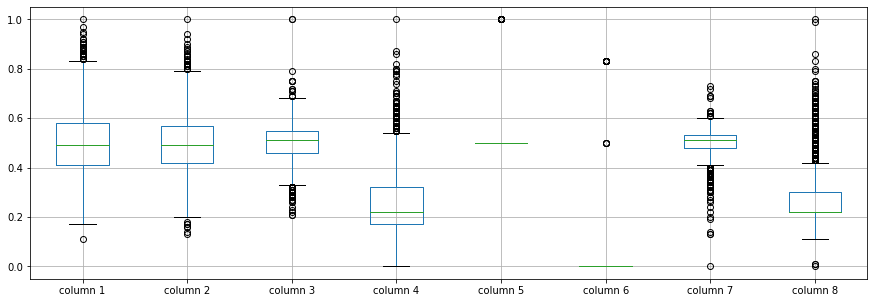

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500264
column 2    0.499503
column 3    0.500139
column 4    0.261619
column 5    0.504739
column 6    0.007536
column 7    0.499850
column 8    0.276303
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.580228,-0.175810,0.159196,0.065098,0.005453,0.074078,-0.122414
column 2,0.580228,1.000000,-0.270597,0.135218,0.061568,0.000615,0.081918,-0.102773
column 3,-0.175810,-0.270597,1.000000,0.059051,-0.008516,0.009317,-0.185255,-0.019009
column 4,0.159196,0.135218,0.059051,1.000000,-0.006362,-0.009498,-0.107092,-0.057008
column 5,0.065098,0.061568,-0.008516,-0.006362,1.000000,-0.009767,0.049504,0.003117
column 6,0.005453,0.000615,0.009317,-0.009498,-0.009767,1.000000,0.027808,-0.035987
column 7,0.074078,0.081918,-0.185255,-0.107092,0.049504,0.027808,1.000000,0.087833
column 8,-0.122414,-0.102773,-0.019009,-0.057008,0.003117,-0.035987,0.087833,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+15,8+15+15,8+15+15+15,8+15+15+15+15,8+15+15+15+15+15,8+15+15+15+15+15+15,8+15+15+15+15+15,8+15+15+15+15,8+15+15+15,8+15+15,8+15,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 3.0105612148409304
Epoch: 1 , loss: 2.6505220065946165
Epoch: 2 , loss: 2.4029847098433454
Epoch: 3 , loss: 2.237756179726642
Epoch: 4 , loss: 2.091865351666575
Epoch: 5 , loss: 1.9924616256485814
Epoch: 6 , loss: 1.8942461609840393
Epoch: 7 , loss: 1.8042148325754248
Epoch: 8 , loss: 1.718107495618903
Epoch: 9 , loss: 1.6533179179481838
Epoch: 10 , loss: 1.5843559011169102
Epoch: 11 , loss: 1.5318592125954835
Epoch: 12 , loss: 1.503440516150516
Epoch: 13 , loss: 1.453709119040033
Epoch: 14 , loss: 1.425053165010784
Epoch: 15 , loss: 1.397374582031499
Epoch: 16 , loss: 1.3578912836054098
Epoch: 17 , loss: 1.344361529402111
Epoch: 18 , loss: 1.3333961400000944
Epoch: 19 , loss: 1.2981448056905165
Epoch: 20 , loss: 1.2812549834666045
Epoch: 21 , loss: 1.2812480589617854
Epoch: 22 , loss: 1.2839799536311107
Epoch: 23 , loss: 1.2486551164284996
Epoch: 24 , loss: 1.2443411032790723
Epoch: 25 , loss: 1.226953

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
1480,0.0,0.0,0.00000,0.0,0.0,-0.000052,0.0,0.0
1481,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
1482,0.0,0.0,-0.17315,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1.4707984522714512, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.03135753762862804

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47000,0.13,0.5,0.000000,0.48,0.22
1,0.43,0.67,0.48000,0.27,0.5,0.000000,0.53,0.22
2,0.64,0.62,0.49000,0.15,0.5,0.000000,0.53,0.22
3,0.58,0.44,0.57000,0.13,0.5,0.000000,0.54,0.22
4,0.42,0.44,0.48000,0.54,0.5,0.000000,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47000,0.18,0.5,0.000000,0.50,0.22
1480,0.35,0.29,0.46000,0.14,0.5,-0.000052,0.54,0.66
1481,0.41,0.47,0.50000,0.14,0.5,0.000000,0.53,0.37
1482,0.51,0.45,0.44685,0.25,0.5,0.000000,0.59,0.22


In [21]:
imputations[-1].to_excel("Yeast_NG_1(imp).xlsx", index=False, header=False)